In [101]:
%load_ext autoreload
%autoreload 2
import numpy as np
from model import Model
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
model = Model()
model.setup()

model.par.Na = 200
model.par.Tmax = 10
model.par.a_max = 50
model.par.Smax = 4
model.par.Ntypes = 1
par.sigma_taste = 0.01

model.set_grids()

In [103]:
par = model.par
sol = model.sol

In [104]:
model.solve()

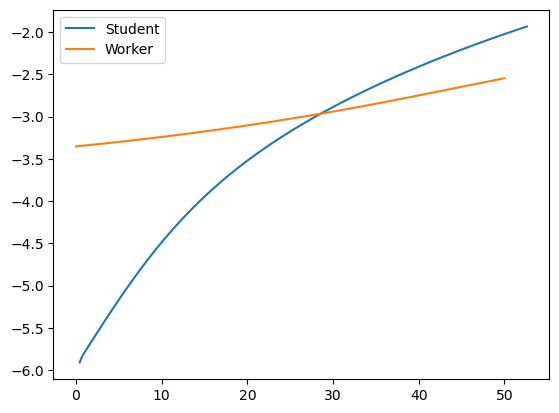

In [105]:
t = 2
s = 2

plt.plot(sol.m[0,t,0,s,:,0],sol.V[0,t,0,s,:,0],label = "Student")
plt.plot(sol.m[0,t,1,s,:,0],sol.V[0,t,1,s,:,0],label = "Worker")
plt.legend();

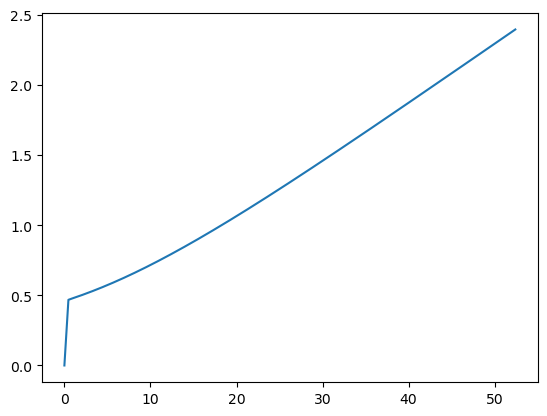

In [100]:
plt.plot(sol.m[0,0,0,0,:,0],sol.c[0,0,0,0,:,0],label = "Student")
